In [1]:
import numpy as np
import polytope as pt
import matplotlib.pyplot as plt


class Obstacle():
    def __init__(self):
        self.obstacles = list()  #list of polytopes
        self.cart = pt.qhull(np.vstack([[0, 0], [1, 1], [2, 0], [1, -1]]))
        self.goal = pt.qhull(np.vstack([[0, 0], [1, 1], [2, 0], [1, -1]]))

    def update_goal(self,corners):
        self.goal = pt.qhull(np.asarray(corners))

    def add_obstacle(self, corners):  #2d array, or 2d list
        p1 = pt.qhull(np.asarray(corners))
        self.obstacles.append(p1)

    def update_cart_postion(self,
                            corners):  #corners are x&y postion of the cart
        self.cart = pt.qhull(np.asarray(corners))

    def check_crash(self):  # Ture: cart hasn't crash into the obstacles.
        for o in self.obstacles:

            #check whether the corners of the cart are in the obstacle
            A = o.A
            b = o.b
            for point in pt.extreme(self.cart):
                if (np.all(A @ point - b <= 0)):
                    return False

            #check corners of the obstacle is in the car
            A = self.cart.A
            b = self.cart.b
            for point in pt.extreme(o):
                if (np.all(A @ point - b <= 0)):
                    return False
        return True

    def check_goal(self):
        A=self.goal.A
        b=self.goal.b
        for point in pt.extreme(self.cart):
            #if there is at least one extreme of the cart is out of the goal area, return false.
            if (not(np.all(A @ point - b <= 0))):
                return False
        return True
            

    def visualize(self):
        fig, ax = plt.subplots()

        for o in self.obstacles:
            o.plot(ax, color='black', linestyle='solid', linewidth=1)

        self.cart.plot(ax,
                       color='pink',
                       linestyle='solid',
                       linewidth=1,
                       alpha=0.5)

        self.goal.plot(ax,
                       color='green',
                       linestyle='solid',
                       linewidth=1,
                       alpha=0.5)

        ax.autoscale_view()
        ax.axis('equal')
        plt.show()


`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


False
False


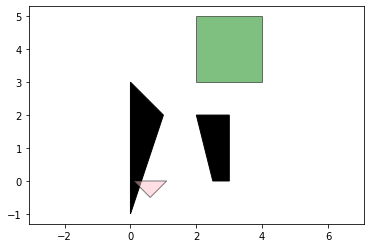

In [4]:
from polytope_obstacle import Obstacle
import numpy as np
import polytope as pt

ob = Obstacle()

ob.update_cart_postion([[0.1, 0],  [1.1, 0], [0.6, -0.5]])

ob.add_obstacle([[2.5, 0], [3, 0], [2, 2], [3, 2]])
ob.update_goal([[2,3],[4,3],[2,5],[4,5]])
# p1 = pt.qhull(np.asarray([[0, 0], [1, 0], [0, 1], [1, 1]]))
# ob.add_obstacle(pt.extreme(p1))
# p1 = p1.translation([1, 0.9])
# ob.add_obstacle(pt.extreme(p1))

ob.add_obstacle([[0, -1], [0, 3], [1, 2]])

print(ob.check_goal())
print(ob.check_crash())

ob.visualize()